In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#read in the data
df = pd.read_csv("1-10-25_antagonist_as_antagonist_plate_all_drugs_data_for_plot.csv", index_col=0)  # Set the first column as row index

In [3]:
df

,OxA,Suvorexant,DMSO,Z133963954,Z2169713547,PV-002353454027,PV-006439055682,PV-002221910629,PV-006204130375,Z3914924625,...,PV-002738102521,PV-000555062637,PV-005932782926,PV-005143787306,PV-005191963626,PV-000574352410,PV-004632151949,Z3360656891,PV-005091654909,Z1738787391
Treatment,,,,,,,,,,,,,,,,,,,,,
Replicate 1,268160,7680,11360,87480,228960,209040,39280,307000,81160,213640,...,428840,427040,140160,361480,533440,178560,548080,184400,274400,228120
Replicate 2,194160,5640,10640,92440,214560,310360,102560,191360,63880,135920,...,190600,317280,140360,97080,119680,127120,284640,187000,191520,67040
Replicate 3,210480,3280,14520,90480,189000,182520,63280,86760,88680,158880,...,138080,178920,72400,133080,186080,295080,74280,112760,80120,147040
Replicate 4,192480,3560,12080,122120,201840,265520,160720,113480,129640,122400,...,206200,91720,113480,126520,166600,143120,109000,70160,82120,176520


In [4]:
#get mean and std dev
column_means = df.mean(axis=0)  # Mean of each column
column_stds = df.std(axis=0)    # Standard deviation of each column

/tmp/ipykernel_874463/879362608.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


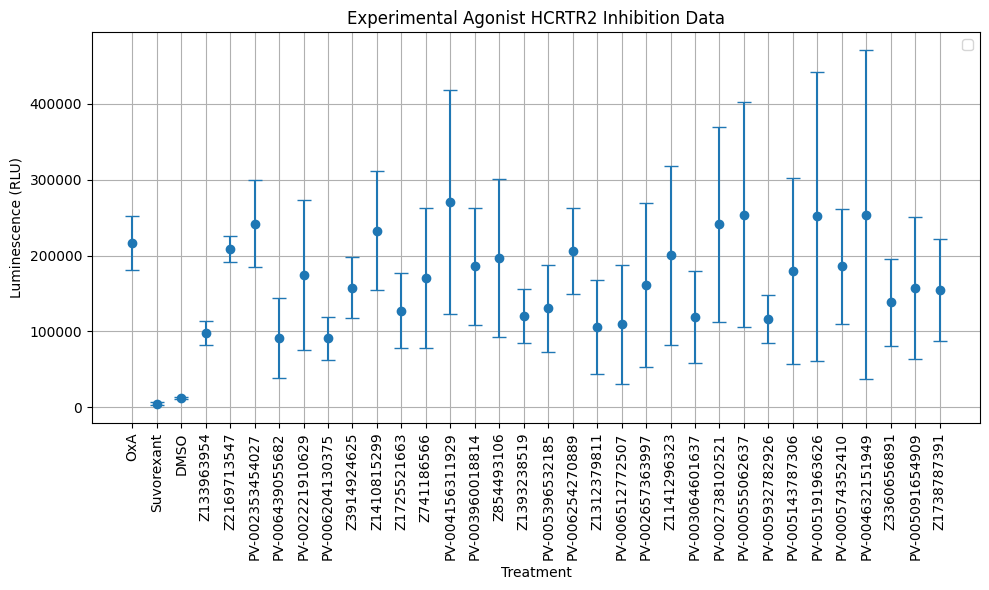

In [5]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(column_means.index, column_means, yerr=column_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
drug_data = df.transpose()
# Drop the row for the drug named "Suvorexant"
drug_data = drug_data.drop("Suvorexant", axis=0)
drug_data

Treatment,Replicate 1,Replicate 2,Replicate 3,Replicate 4
OxA,268160,194160,210480,192480
DMSO,11360,10640,14520,12080
Z133963954,87480,92440,90480,122120
Z2169713547,228960,214560,189000,201840
PV-002353454027,209040,310360,182520,265520
PV-006439055682,39280,102560,63280,160720
PV-002221910629,307000,191360,86760,113480
PV-006204130375,81160,63880,88680,129640
Z3914924625,213640,135920,158880,122400
Z1410815299,303160,289680,200080,138160


/tmp/ipykernel_874463/10781795.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
/tmp/ipykernel_874463/10781795.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"


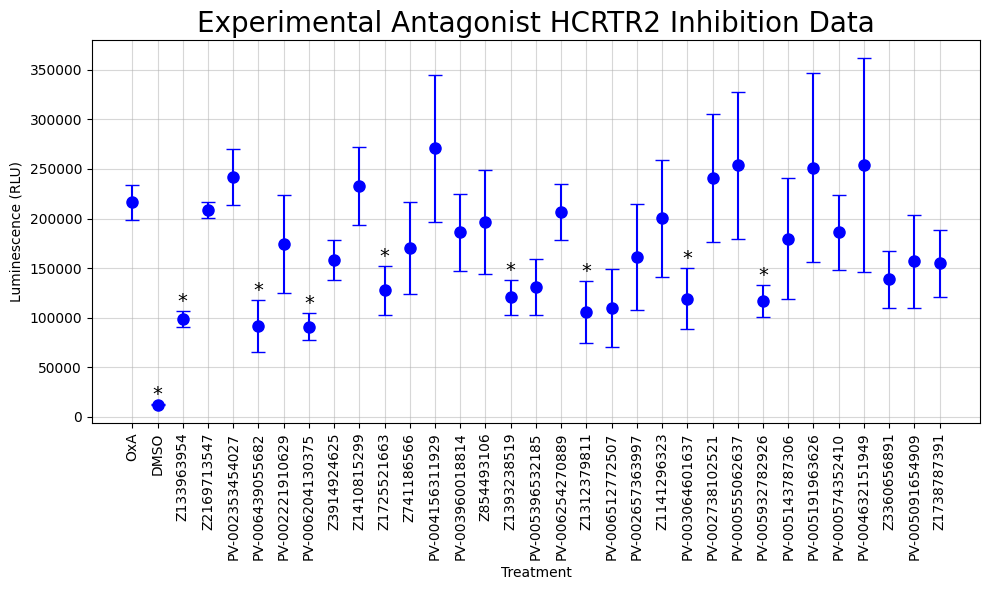

In [8]:
# Extract drug names from the index (row headers)
drug_names = drug_data.index  # Drug names are now the row index
replicates = drug_data  # Replicates are the rest of the data (without the row names)

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows for each drug)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows for each drug)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is now the first row in the data (first index)
first_drug_values = replicates.iloc[0, :]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i, :]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Specify a color for all data points (e.g., 'blue')
color = 'blue'

# Plot the drugs with error bars and set all data points to the same color
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Antagonist HCRTR2 Inhibition Data', fontsize = 20)
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()